In [1]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.set(font_scale=2)

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


def read_each_csv(filename="Number-of-layers-results.csv"):
    
    df = pd.read_csv(filename)
    # add a column to calculate y data
    df = df.rename(columns={df.columns[0]: 'Epoch',df.columns[1]: 'y',df.columns[2]: 'step3',df.columns[3]: 'step4'})

    return df



In [3]:
import re
# https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

##read the CSV

path= 'FineTuningPerformance'
folder=os.listdir(path)
# scene_index=7
user_file='10'
# print(os.listdir(path))


## for csv in directory, load
csv_for_certain_scene=[]
for file in folder:
#     if file==user_file:
        dir = os.path.join(path, file)
        print (os.path.join(path, file))
        csv_for_certain_scene.append(dir)


FineTuningPerformance\CMU_Corrupted_Baluja.csv
FineTuningPerformance\CMU_Corrupted_Baluja_Finetuning.csv
FineTuningPerformance\CMU_Corrupted_Our.csv
FineTuningPerformance\CMU_Uncorrupted_Baluja.csv
FineTuningPerformance\CMU_Uncorrupted_Baluja_Finetuning.csv
FineTuningPerformance\CMU_Uncorrupted_HyperSteg_Finetuning.csv
FineTuningPerformance\CMU_Uncorrupted_Our.csv
FineTuningPerformance\MTM_Corrupted_Baluja.csv
FineTuningPerformance\MTM_Corrupted_Baluja_Finetuning.csv
FineTuningPerformance\MTM_Corrupted_Our.csv
FineTuningPerformance\MTM_Uncorrupted_Baluja.csv
FineTuningPerformance\MTM_Uncorrupted_Baluja_Finetuning.csv
FineTuningPerformance\MTM_Uncorrupted_HyperSteg_Finetuning.csv
FineTuningPerformance\MTM_Uncorrupted_Our.csv


In [4]:
## this cell merge all the users of certain scene into 1
csv_dataframes=[]
users_y=[]

path_to_write='21ppl/'
for csv in csv_for_certain_scene:
    csv_dataframes.append(read_each_csv(csv)) 
    print(csv)



dataframe=pd.concat(csv_dataframes)
os.makedirs(path, exist_ok=True)  
print(csv.split("\\")[-2])
dataframe.to_csv(path+'/'+'all_settings'+'.csv')


FineTuningPerformance\CMU_Corrupted_Baluja.csv
FineTuningPerformance\CMU_Corrupted_Baluja_Finetuning.csv
FineTuningPerformance\CMU_Corrupted_Our.csv
FineTuningPerformance\CMU_Uncorrupted_Baluja.csv
FineTuningPerformance\CMU_Uncorrupted_Baluja_Finetuning.csv
FineTuningPerformance\CMU_Uncorrupted_HyperSteg_Finetuning.csv
FineTuningPerformance\CMU_Uncorrupted_Our.csv
FineTuningPerformance\MTM_Corrupted_Baluja.csv
FineTuningPerformance\MTM_Corrupted_Baluja_Finetuning.csv
FineTuningPerformance\MTM_Corrupted_Our.csv
FineTuningPerformance\MTM_Uncorrupted_Baluja.csv
FineTuningPerformance\MTM_Uncorrupted_Baluja_Finetuning.csv
FineTuningPerformance\MTM_Uncorrupted_HyperSteg_Finetuning.csv
FineTuningPerformance\MTM_Uncorrupted_Our.csv
FineTuningPerformance


In [10]:
plot =  pd.read_csv("FineTuningPerformance\\all_settings.csv")

# plot.y= -10*(np.log10(plot.y))
plot.y = np.log10(plot.y)
plot.Method = np.where(plot.Method=='Our',"Ours-trained-from-scratch",plot.Method)
plot.Method = np.where(plot.Method=='Baluja',"Baluja-trained-from-scratch",plot.Method)
plot.Method = np.where(plot.Method=='Baluja-ImageNet-Finetuned',"Baluja-ImageNet-finetuned",plot.Method)
plot2 = plot.query("Epoch < 101")
plot2 = plot2.query("Dataset == 'CMU'")


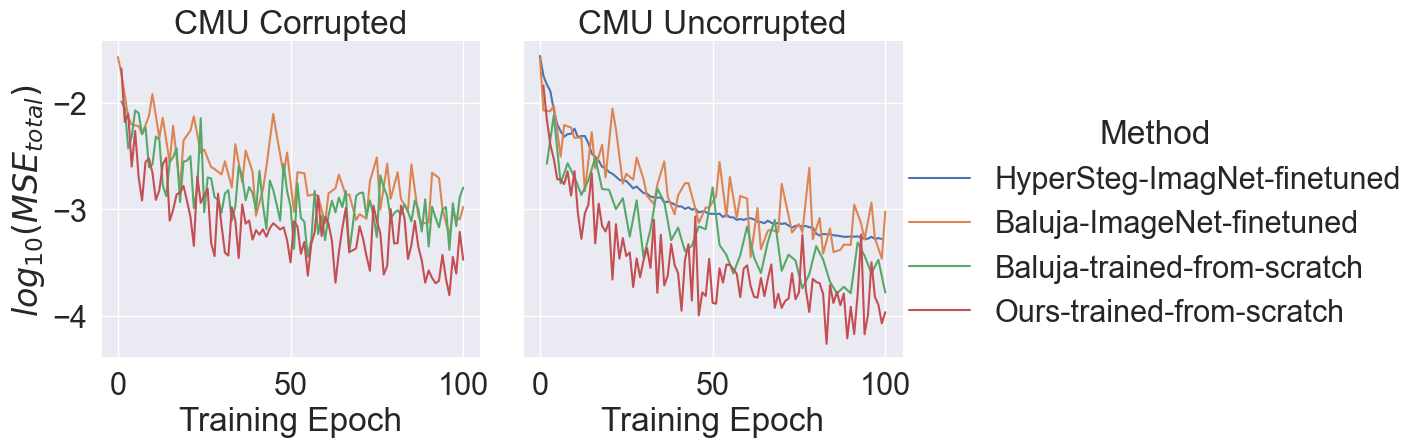

In [11]:

import matplotlib.ticker as ticker

hue_order = [ 'HyperSteg-ImagNet-finetuned','Baluja-ImageNet-finetuned', 'Baluja-trained-from-scratch', 'Ours-trained-from-scratch']

g = sns.relplot(
    data=plot2, x="Epoch", y="y",hue="Method",
    col="Status", hue_order=hue_order,
    kind="line"
)


# g.set_titles({"Corrupted","Uncorrupted"})
# g.set_xticklabels (np.arange(1,100,10))
g.set_axis_labels( "Training Epoch", "$log_{10}(MSE_{total})$")
# https://stackoverflow.com/questions/31632372/customizing-annotation-with-seaborns-facetgrid
g.set_titles('CMU {col_name}')
# g.xaxis.set_major_locator(ticker.MultipleLocator(10))
